# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [14]:
from sklearn.datasets import make_blobs
df=make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)
df[0].shape, df[1].shape

((1200, 8), (1200,))

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

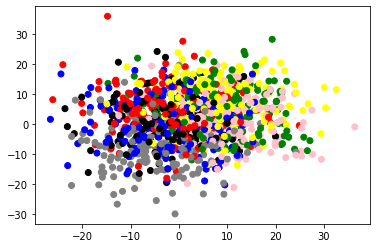

In [64]:
X=df[0]; 

dfx=pd.DataFrame(data=X, columns=["x1","x2","x3","x4","x5","x6","x7","x8"])
dfy=pd.DataFrame(data=y, columns=["y"])

x1=dfx["x1"];
x2=dfx["x2"]

mapp={0: "red", 1: "blue", 2: "black", 3:"yellow", 4:"pink", 5:"green", 6:"grey", 7:"purple"}

colours = [mapp[x] for x in y]
plt.scatter(x1,x2,c=colours)

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [68]:
from tensorflow.keras.utils import to_categorical
y_cat=to_categorical(y)
y_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size=0.3)
X_train, X_test, y_train, y_test

(array([[  2.91859551,  16.83140952, -14.870075  , ...,  14.42671831,
         -21.88058314,  -0.09319078],
        [ 25.39948285,  -1.25647479,  11.43913621, ...,  -2.26167295,
         -26.88459449,  14.78640237],
        [  5.23716253,  11.80680657,   9.90614651, ...,   2.66713544,
         -10.68099331,   8.35786113],
        ...,
        [  4.1715777 ,   0.51037009,   2.21045287, ...,   3.9521562 ,
         -10.04375853,  -3.60150213],
        [ 17.72493156,   5.87630998,  -4.38895561, ...,   7.25107183,
           0.65366093,  -5.78124564],
        [ -6.36307274,   1.23481615, -16.44094869, ...,   0.49014493,
         -18.49948885,  11.01770785]]),
 array([[ -0.73869407,   6.3953755 ,   6.86900994, ...,  13.43222236,
         -15.60330995,  -0.79247216],
        [  2.20516928,   2.97483603, -11.71358278, ...,   2.35565478,
          -8.81692639,  -2.92045442],
        [  7.70542937,  -6.49580554,   8.34050776, ...,   9.90812433,
         -11.20651983,   9.39914376],
        ...,


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [92]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)


In [93]:
dfxs=pd.DataFrame(data=X_train_scaled, columns=dfx.columns)
dfxs

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.072560,1.689723,-1.075027,-0.899604,-0.255454,1.218633,-1.788456,0.009712
1,2.276674,-0.338078,1.943662,0.158618,1.879157,-0.459175,-2.282638,1.641655
2,0.299881,1.126424,1.767768,-0.962282,1.496384,0.036355,-0.682416,0.936594
3,1.015566,-0.929412,0.409638,1.080729,0.712915,0.559630,-0.226361,0.865090
4,-1.621588,0.341753,1.657109,1.235522,1.451662,0.789545,-0.161803,0.845607
...,...,...,...,...,...,...,...,...
835,-0.286753,1.476369,0.332933,0.605150,0.667146,-0.407346,-0.372267,-0.658913
836,-0.782395,0.879478,-0.777088,-0.655205,1.403221,0.092135,1.002021,0.668581
837,0.195407,-0.140000,0.884773,0.667650,0.385971,0.165547,-0.619485,-0.375068
838,1.524231,0.461566,0.127565,-0.545024,0.295062,0.497212,0.436962,-0.614134


In [94]:
from tensorflow.keras import models, layers

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [111]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8)) 
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [112]:
y_train.shape, X_train_scaled.shape

((840, 7), (840, 8))

❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [113]:
history = model.fit(X_train_scaled,y_train, epochs=50, verbose=1)

Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 2.0046 - accuracy: 0.1262
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7621 - accuracy: 0.2821
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 1.5805 - accuracy: 0.4369
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 1.4320 - accuracy: 0.5452
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 1.3127 - accuracy: 0.6024
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2133 - accuracy: 0.6250
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 1.1309 - accuracy: 0.6500
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 1.0637 - accuracy: 0.6619
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 1.0109 - accuracy: 0.6726
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.9686 - accuracy: 0.6762
Epoch 11/50
27/27 [

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [114]:
accuracy=model.evaluate(X_test,y_test)[1]

12/12 [==============================] - 0s 2ms/step - loss: 4.4253 - accuracy: 0.6694


❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [115]:
accuracy_baseline = 1/7

In [121]:
history.history.keys()
history.history["loss"],history.history["accuracy"]

([2.004563093185425,
  1.7621395587921143,
  1.580546498298645,
  1.4319874048233032,
  1.3127222061157227,
  1.2132552862167358,
  1.130934476852417,
  1.0637328624725342,
  1.0109226703643799,
  0.968597412109375,
  0.9362766742706299,
  0.9092622995376587,
  0.8884283900260925,
  0.8709613084793091,
  0.8567619919776917,
  0.8458579182624817,
  0.8364027738571167,
  0.8272702693939209,
  0.8207157850265503,
  0.8150787949562073,
  0.8091766238212585,
  0.804865300655365,
  0.8002665042877197,
  0.7955604791641235,
  0.7922511696815491,
  0.7883843779563904,
  0.7849108576774597,
  0.784485399723053,
  0.7812849283218384,
  0.7774817943572998,
  0.774895429611206,
  0.7725938558578491,
  0.7699340581893921,
  0.767822265625,
  0.7661437392234802,
  0.7654430866241455,
  0.7618038654327393,
  0.7597798705101013,
  0.7591005563735962,
  0.7583447694778442,
  0.7540261149406433,
  0.7527807354927063,
  0.7498158812522888,
  0.7483564615249634,
  0.7469095587730408,
  0.745740532875061,


🧪 **Test your code**

In [116]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/03-Multiclass-classification
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_baseline.py::TestBaseline::test_accuracy PASSED               [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master


❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [123]:
model=initialize_model()
history = model.fit(X_train_scaled,y_train, epochs=1000, verbose=0)

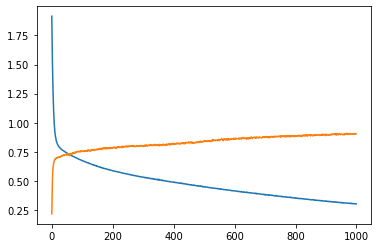

In [129]:
array = np.array(history.history["loss"]);
import matplotlib.pyplot as plt
plt.plot(array)
plt.plot(np.array(history.history["accuracy"]));

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [130]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 20.0411 - accuracy: 0.5361


[20.041078567504883, 0.5361111164093018]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [131]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

NameError: name 'plot_history' is not defined

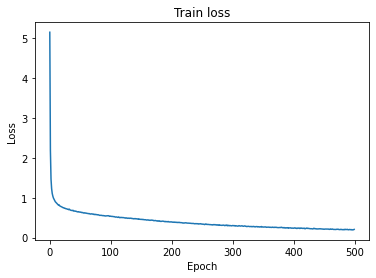

In [132]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [133]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

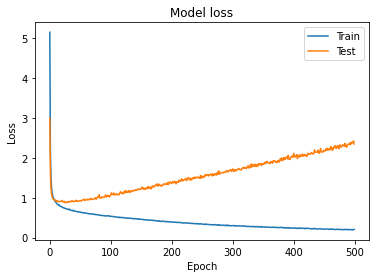

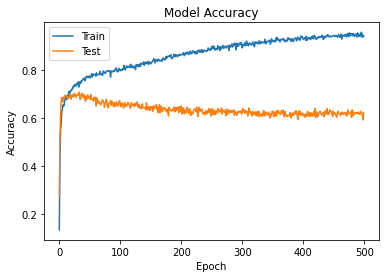

In [134]:
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in it's train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!